In [1]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importowanie csv do ramki danych
#passengers = pd.read_csv('train_and_test2.csv')
#passengers.head()
data = pd.read_csv('cardio_train_comma.csv')
data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# analiza danych statystycznych
print(data.describe())
print(data.info())
print(data.isnull().values.any())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [3]:
# rozkład płci
#passengers['Sex'].hist(bins=2) 

In [4]:
# rozkład "ocalałych"
#passengers['2urvived'].hist(bins=2) 

In [5]:
# rozkład danych z uwzglednieniem wieku
#passengers['Age'].plot.box() 

In [6]:
#2. usuwanie nieprzydatnych danych
data.drop(['id'], axis=1, inplace = True)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


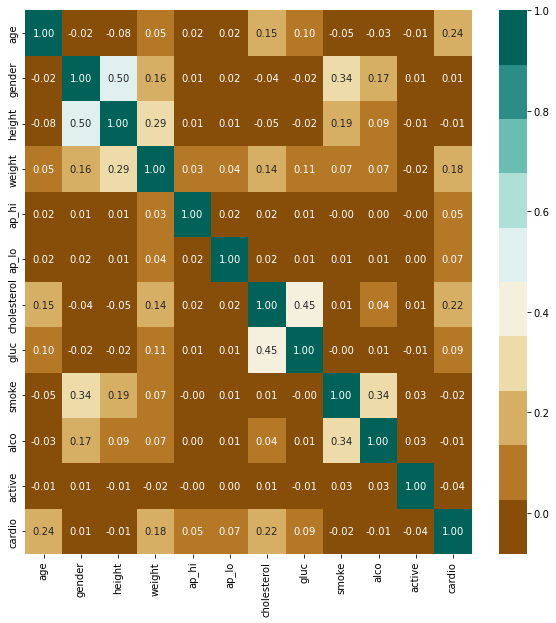

In [7]:
# wyznaczenie macierzy korelacji

correlations = data.corr()

fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(data.columns)

plt.show()


# Variable	Definition	Key
# survival 	Survival 	0 = No, 1 = Yes
# pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
# sex 	Sex 	
# Age 	Age in years 	
# sibsp 	# of siblings / spouses aboard the Titanic 	
# parch 	# of parents / children aboard the Titanic 	
# ticket 	Ticket number 	
# fare 	Passenger fare 	
# cabin 	Cabin number 	
# embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
# uzupełnienie pustych wartości
data = data.sample(frac=1).reset_index(drop=True)
data.fillna(data.mean(), inplace=True)
dataCopy = data.copy()
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,19794,1,170,84.0,120,80,2,1,0,0,1,1
1,18283,2,170,65.0,120,80,3,3,0,0,1,1
2,18839,1,158,67.0,140,90,1,2,0,0,1,1
3,18131,2,190,96.0,120,80,1,1,0,0,1,1
4,21233,1,168,59.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,22716,1,161,89.0,120,90,1,1,0,0,1,1
69996,20346,1,168,94.0,90,80,1,1,0,0,1,1
69997,19777,1,152,71.0,130,80,1,1,0,0,0,1
69998,23505,1,170,80.0,160,100,3,1,0,0,1,1


In [9]:
# zbiór danych
#data['age'] = data['age'] / 365
X = data.drop('cardio', axis=1).to_numpy().astype('int')
X

array([[19794,     1,   170, ...,     0,     0,     1],
       [18283,     2,   170, ...,     0,     0,     1],
       [18839,     1,   158, ...,     0,     0,     1],
       ...,
       [19777,     1,   152, ...,     0,     0,     0],
       [23505,     1,   170, ...,     0,     0,     1],
       [19010,     2,   168, ...,     1,     1,     1]])

In [10]:
# zbiór etykiet
y = data.loc[:, 'cardio'].to_numpy().astype('bool')
y

array([ True,  True,  True, ...,  True,  True, False])

In [11]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) 

In [12]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [13]:
# MODEL 1 - regresja logistyczna 
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.730282561126439, 0.6878136200716846, 0.7084121637211019, 0.6990952380952381]


H:\Programy\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

In [14]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.7324707449338788, 0.7100433459374712, 0.721082701133277, 0.7163809523809523]


<AxesSubplot:>

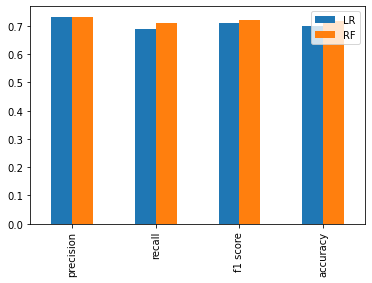

In [15]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [16]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=5000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.33460184568547235, 0.8009565019357777, 0.47201717890216077, 0.6253333333333333]


In [ ]:
#0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]

In [ ]:
# działania korygujące - hiperparametry

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [0.2836076491294834, 0.6649565023421816, 0.3976257169534481, 0.5699047619047619]
SVM kernel='sigmoid' [0.4079535724479117, 0.4041089435491471, 0.40602215699270905, 0.4025714285714286]
